### 1. Load the cleaned dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the base path for the data folder
data_folder = os.path.join(os.path.dirname(os.getcwd()), 'data')

cleaned_data_df = pd.read_csv(os.path.join(data_folder, 'Task3_Final_Content_Data_set.csv'))

### 2. Analyze the data for insights:

* Number of unique categories:

In [ ]:
unique_categories = cleaned_data_df['Category'].nunique()
print(f"Number of unique categories: {unique_categories}")

Number of unique categories: 16


* Top 5 content categories:

In [9]:
top_categories = cleaned_data_df.groupby('Category')['Score'].sum().sort_values(ascending=False).head(5)
print("Top 5 categories:")
print(top_categories)

Top 5 categories:
Category
animals           74965
science           71168
healthy eating    69339
technology        68738
food              66676
Name: Score, dtype: int64


* Reactions to the most popular category:

In [10]:
top_category = top_categories.idxmax()
reactions_to_top_category = cleaned_data_df[cleaned_data_df['Category'] == top_category]['Score'].sum()
print(f"Reactions to the most popular category '{top_category}': {reactions_to_top_category}")


Reactions to the most popular category 'animals': 74965


### 3. Create Visualizations:

* Top 5 Categories Bar Chart:

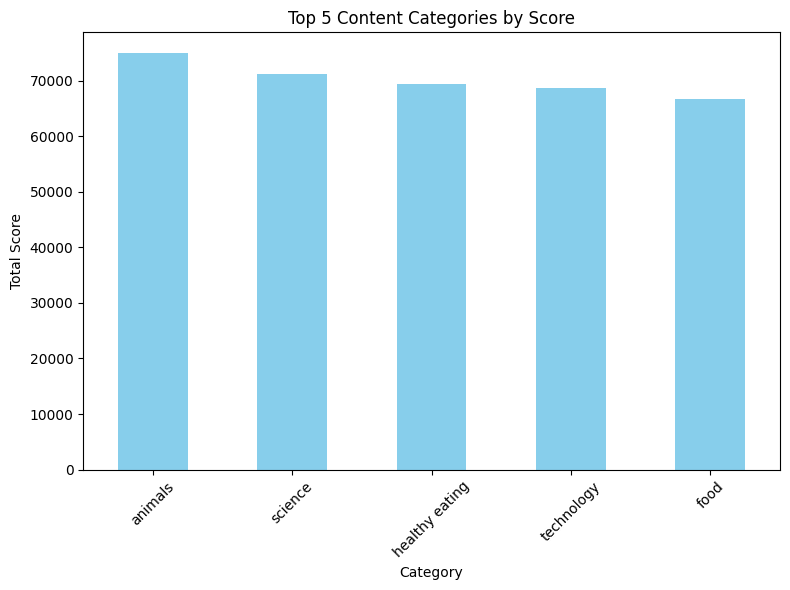

In [11]:
top_categories.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title("Top 5 Content Categories by Score")
plt.ylabel("Total Score")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Pie Chart for Top 5 Categories:

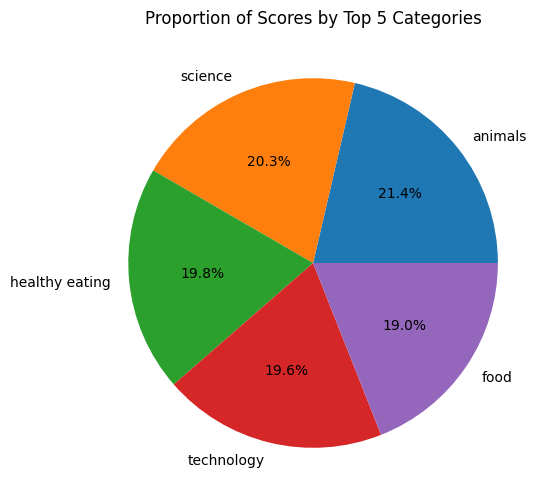

In [12]:
top_categories.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6))
plt.title("Proportion of Scores by Top 5 Categories")
plt.ylabel("")
plt.show()

* Posts per Month Line Chart:

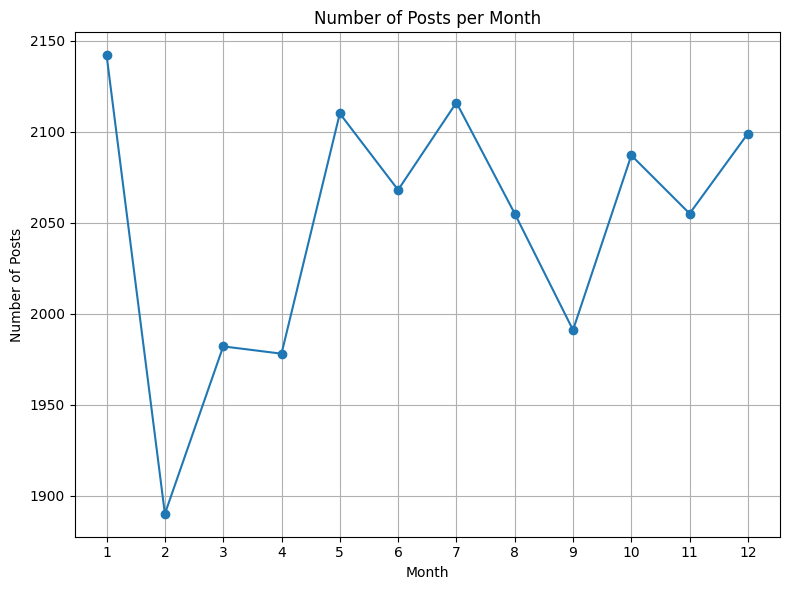

In [14]:
# Ensure 'Datetime' is in datetime format
cleaned_data_df['Datetime'] = pd.to_datetime(cleaned_data_df['Datetime'], errors='coerce')

# Check for any rows where the conversion failed (NaT values)
if cleaned_data_df['Datetime'].isna().sum() > 0:
    print("Warning: Some rows have invalid datetime values. These will be excluded.")
    cleaned_data_df = cleaned_data_df.dropna(subset=['Datetime'])

posts_per_month = cleaned_data_df['Datetime'].dt.month.value_counts().sort_index()
posts_per_month.plot(kind='line', marker='o', figsize=(8, 6))
plt.title("Number of Posts per Month")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(range(1, 13))  # Ensure all months are labeled
plt.grid()
plt.tight_layout()
plt.show()

### 4. Save the Charts for Presentation:

In [17]:
plt.savefig('top_categories_bar_chart.jpg')
plt.savefig('top_categories_pie_chart.png')
plt.savefig('posts_per_month_line_chart.png')

<Figure size 640x480 with 0 Axes>

In [18]:
cleaned_data_df['Datetime'] = pd.to_datetime(cleaned_data_df['Datetime'])
month_with_most_posts = cleaned_data_df['Datetime'].dt.month.value_counts().idxmax()
print(f"Month with the most posts: {month_with_most_posts}")

Month with the most posts: 1
